# Assignment 3 (Part 1)

Part 1 of the third assignment is worth 25 points.

## Neural Networks

Also known as Multi-Layer-Perceptrons (MLP). Hence for this assignment you will use the MLPClassifier class from Sklearn. 

Take a look at the documentation to learn more about the default parameterisation (which activation function it uses, which optimizer/solver it uses, number and size of hidden layers, etc.) of the MLPClassifer: 

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html. 


This parctical part of the assignment is devided in 2 main tasks:


*   Training a neural network on MNIST data (3 points)
*   Training a neural networks on customer data (22 points)







### Task 1: Neural Network Classifier on MNIST 

In [21]:
# load required libraries
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The task will be to perform classification on handwritten digits from 0 to 9 (MNIST dataset). (We've seen this dataset in the previous assignment)

In [3]:
# download dataset from https://www.openml.org/ which contains many sample datasets for machine learning
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

**Recap**: The dataset contains 70000 examples of which each example has 784 values (pixels). These pixels are in a flat array but represent a 28 by 28 pixel gray-scale image. Values range from 0 to 255 which is common in the RGB value range. A value of 0 represents a black pixel whereas 255 represents a white pixel. Different shades of gray are any value larger than 0 but smaller than 255.

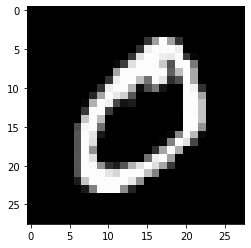

In [13]:
# if we want to plot a single example we need to reshape the array
first_image = np.array(X[1:2], dtype='float').reshape((28, 28))
plt.imshow(first_image, cmap='gray')

#### Instructions

**You are expected to do:**


*   Data preparation: 
 *   Perform a 80/20 train/test split
 *   Perform feature scaling
*   Train the model
 *   Please use `MLPClassifier` from `sklearn.neural_network`
*   Evaluate the model performance
 *   Calculate the accuracy
 *   Plot the confusion matrix
 *   Additionally, plot some misclassified instances  (if there are any). You can use the plt.imshow() function as shown above
* Compare the model performance with the results of the softmax regression on MNIST in the previous assignment



In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
x_train.shape, x_test.shape

((56000, 784), (14000, 784))

In [15]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
classifier = MLPClassifier()
classifier.fit(x_train_scaled, y_train)

MLPClassifier()

In [17]:
predictions = classifier.predict(x_test_scaled)
predictions.shape

(14000,)

In [18]:
score = classifier.score(x_test_scaled, y_test)
score

0.9789285714285715

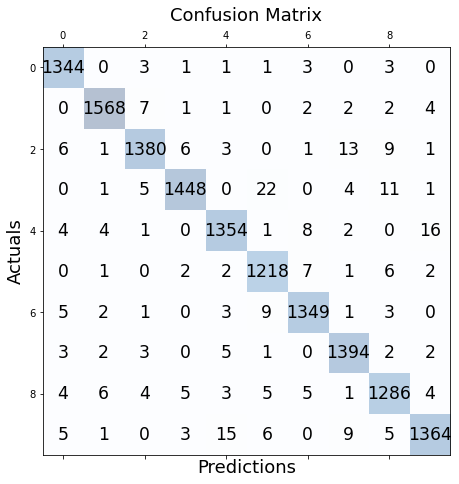

In [22]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


### Task 2: neural network classifier


In [20]:
# load required libraries
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Dataset 

This is a classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository and contains >41k records. You can find more information about the features (attributes) on the official UCI website:
https://archive.ics.uci.edu/ml/datasets/bank+marketing

The dataset gives you information about a marketing campaign of a financial institution in which can be analysed in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

The target variable is called 'deposit' which describes if a person has subscribed to a term deposit (German: "Termineinlage", more information: https://www.investopedia.com/terms/t/termdeposit.asp).

---

Your task will be to train a neural network which will be used to predict if a person will subscribe to a term deposit.

In [3]:
# Import the data
data = pd.read_csv('https://raw.githubusercontent.com/schneiderson/ATIT2-22/main/sample_data/bank.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f869aff0610>,
      dtype=object)

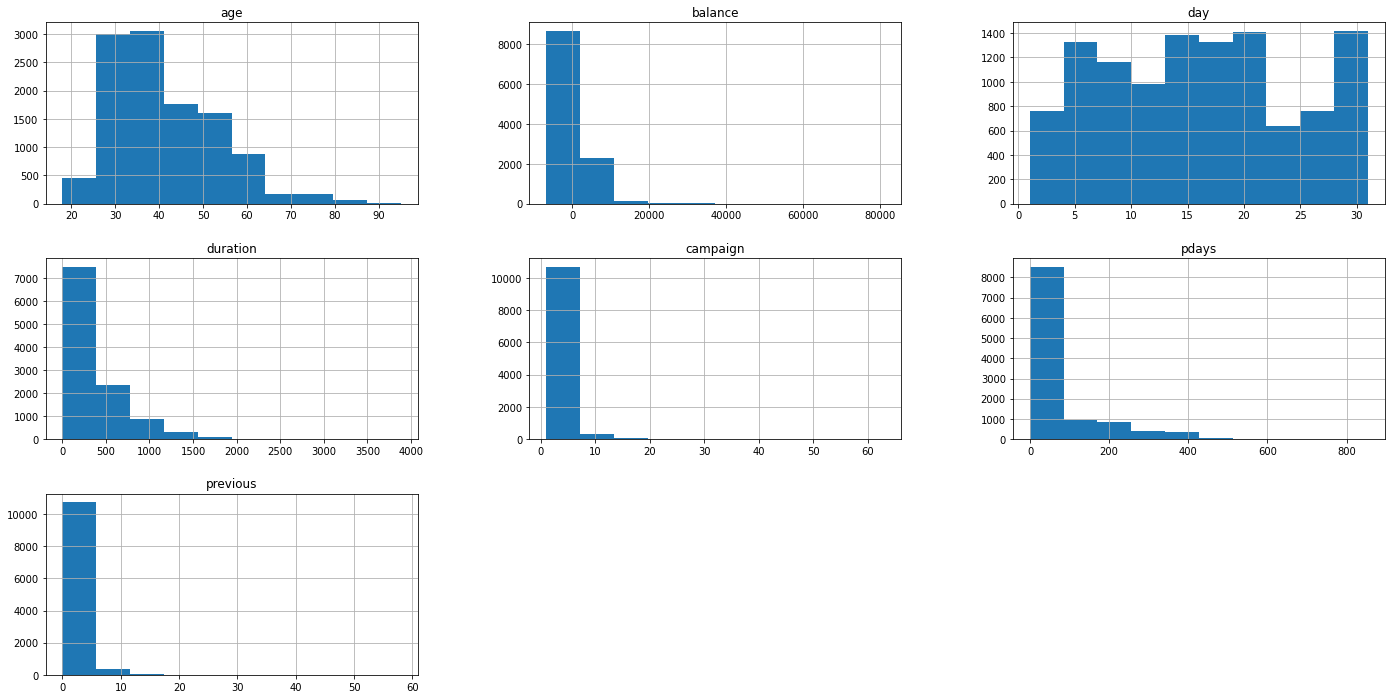

In [4]:
plt.rcParams["figure.figsize"] = (24, 12)
X.hist()

#### Instructions

This task will combine a lot of different aspect of what we have discussed in class over the past weeks.

**You are expected to do:**

*   **Data exploration** (6 points):
 *   Check which features are available. 
 > *   Can some features directly be discarded?
 *   Check if data is messy (e.g. missing values)
 *   Check for correlation with target variable
 *   Look for outliers
 *   Class distribution
*   **Data preparation** (6 points):
 *   Perform some data cleaning e.g.
  >  *   Replace missing values
  >  *   Outlier handling
  >  *   Removal of duplicates
 *   Convert non-numeric features to numeric features
 *   Perform a 80/20 train/test split
 *   Perform feature scaling
 *   In case of class imbalance, think about how you want to deal with it. Please briefly explain your decision.
*   **Training and model evaluation** (10 points):
 *   Please use `MLPClassifier` from `sklearn.neural_network`
 > *   The model should have 4 hidden layers with sizes hidden_layer_size=(10, 1) (parameter hidden_layer_sizes)
 > *   Set the batch_size to 64
 *   Evaluate the model performance
 > *   Calculate the accuracy and other metrics which might be helpful to evaluate the model's performance
 > *   Based on you findings, describe some measures you could take to improve the model's performance even further.
 > *   Try to analyse if you see indications of underfitting or overfitting and which countermeasures you could take.
 *   Please train another model using one of the techniques we have discussed in the lectures and compare the performance to the performance achieved with the neural network.


**For each decision you make, briefly explain your reasoning.**



**Data exploration (6 points):**

In [5]:
X.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
X.select_dtypes('object').describe()

,job,marital,education,default,housing,loan,contact,month,poutcome
count,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,no,no,cellular,may,unknown
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326


It is not possible to consider job and month --> 12 unique values 

**Data preparation (6 points):**

In [7]:
X.isnull().sum()  #No null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

--> all are zero values , so we dont have any nan values in this data set

In [8]:
print(X.duplicated().value_counts()) # To check duplicated values

False    11162
dtype: int64


--> no duplicates aswell

In [19]:
plt.rcParams["figure.figsize"] = (22, 3)
numeric_array = X._get_numeric_data().columns.tolist()
print(numeric_array)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [14]:
X['age'].head()

0    59
1    56
2    41
3    55
4    54
Name: age, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


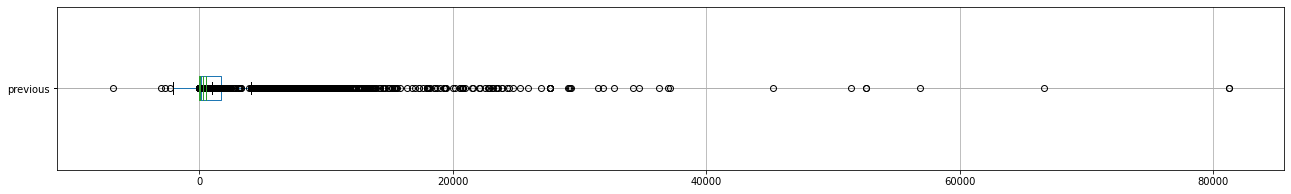

In [18]:
for arraycol in numeric_array:
  temp_df = pd.DataFrame(X, columns=[arraycol])
  print(temp_df.boxplot(vert=False))
  

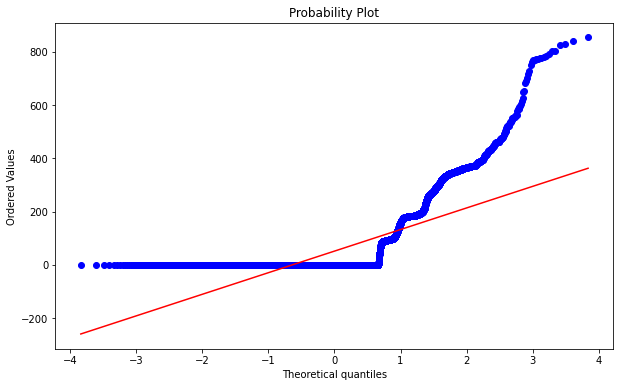

In [40]:
import scipy.stats as stats 

plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(X['pdays'], dist="norm", plot=plt)
plt.show()

In [23]:
lencoder = LabelEncoder()

xa_Encode = X.copy()
xa_Encode.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

---


#### Further tips for working on the assignment:

When analyzing the model's performance, please think about what the baseline performance of the task would be and if your model performs better or not. It is quite unlikely the model will get a perfect score with the given parametrization. You can try to improve the performance by varying several hyperparameters of the model (e.g. number of hidden layers and number of neurons in a hidden layer, batch_size, training epochs, etc.). 

Please be aware that too many hidden layers and neurons and a large number of epochs will cause the model to train longer. If the model is too complex you might encounter time-outs in Colab.

If the number of epochs is too low, sklearn will show a warning that the model has not yet converged.